# Creating, saving, and loading an individual task

### Imports

In [1]:
import sys
sys.path.append('../')

In [2]:
from cognitive.task_generator import TemporalTask
from cognitive import stim_generator as sg
from cognitive import task_generator as tg
from cognitive import constants as const
import json

### Task Creation

- Here we create a task where the goal is to correctly compare the locations of two stimuli (objects)
    - We use the TemporalTask class as a parent class to build from. (All custom tasks must inherit from this TemporalTask)

In [3]:
class CompareLocTemporal(TemporalTask):
    """Compare location between two objects."""

    def __init__(self, whens):
        """
            :param whens: the list of two frame names to compare stimuli location between
        """

        # Initialize Class with parent class
        super(CompareLocTemporal, self).__init__(whens=whens)

        # Select the specified frames
        objs1 = tg.Select(when=self.whens[0])
        objs2 = tg.Select(when=self.whens[1])

        # Get the locations of stimuli within each frame
        a1 = tg.GetLoc(objs1)
        a2 = tg.GetLoc(objs2)

        # Set operator to check if they're the same location
        self._operator = tg.IsSame(a1, a2)

        # 
        self.n_frames = const.compare_when([self.whens[0], self.whens[1]]) + 1

- Define the stimulus directoty and define the data constants class

In [5]:
stim_dir = '../data/shapenet_handpicked_val'
const.DATA = const.Data(stim_dir, train=False)

- Define the whens and create enstantiate the comparison task object
    - Here we define the whens such that the objects in frame 0 and 4 are compared by location

In [6]:
whens = ['last0', 'last4']
comp_loc_task = CompareLocTemporal(whens)

- Save the task as a json file

In [7]:
comp_loc_task.to_json('comp_loc_task_.json')

{'n_frames': 5,
 'first_shareable': 2,
 'avg_mem': None,
 'whens': ['last0', 'last4'],
 'operator': {'name': 'IsSame',
  'child': [{'name': 'GetLoc',
    'child': [{'name': 'Select',
      'child': [{'name': 'Loc', 'value': None},
       {'name': 'SNCategory', 'value': None},
       {'name': 'SNObject',
        'value': None,
        'category': {'name': 'SNCategory', 'value': None}},
       {'name': 'SNViewAngle',
        'value': None,
        'sn_object': {'name': 'SNObject',
         'value': None,
         'category': {'name': 'SNCategory', 'value': None}}}],
      'when': 'last0'}]},
   {'name': 'GetLoc',
    'child': [{'name': 'Select',
      'child': [{'name': 'Loc', 'value': None},
       {'name': 'SNCategory', 'value': None},
       {'name': 'SNObject',
        'value': None,
        'category': {'name': 'SNCategory', 'value': None}},
       {'name': 'SNViewAngle',
        'value': None,
        'sn_object': {'name': 'SNObject',
         'value': None,
         'category': {'

- Reinstantiate task from json file

In [8]:
f = open('comp_loc_task_.json')
task_dict = json.load(f)

# first you have to load the operator objects
task_dict['operator'] = tg.load_operator_json(task_dict['operator'])

# we must reinitialize using the parent task class. (the created task object is functionally identical) 
comp_loc_task = TemporalTask(
    operator=task_dict['operator'],
    n_frames=task_dict['n_frames'],
    first_shareable=task_dict['first_shareable'],
    whens=task_dict['whens']
)

- Visualize the graph network of the task
    - To visualize the graph we must first get the graph object from the task object

In [9]:
comp_loc_task

In [10]:
G = comp_loc_task.to_graph()
comp_loc_task.draw_graph('comp_loc_task_.png', G)

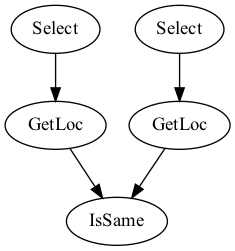

In [12]:
from IPython.display import Image
Image('comp_loc_task_.png')